# Import

In [ ]:
# data preparation
import pandas as pd 
import numpy as np 

# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns

# regression & prediction 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data reading and preparation

In [2]:
data = pd.read_csv("/Users/matheusmaciel/CASS/MSc 2021-22 /Term 1 /Digital Tech & Value Creation/Indivdual Assign/Credit_data.csv", index_col=0)
pilot = pd.read_csv("/Users/matheusmaciel/CASS/MSc 2021-22 /Term 1 /Digital Tech & Value Creation/Indivdual Assign/New_applicantions.csv", index_col=0)

In [3]:
data.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [4]:
print(data.columns)

print(pilot.columns)         # contains 1 unnamed column

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_0'],
      dtype='object')
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Unnamed: 24'],
      dtype='object')


In [5]:
# using same name for the 'unnamed' column where predicted values will be placed 
pilot = pilot.rename(columns = {'Unnamed: 24': 'default_0'})
print(pilot.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_0'],
      dtype='object')


Adjusting categories in EDUCATION and MARRIAGE

- Most of the data is already cleaned (e.g education level being enconded in numbers between 1-6
- However, some of this data is irrelevant -- 'other' and 'unknow' are virtually the same for "MARRIAGE" and "EDUCATION" columns. Thus, they can all be grouped into one category 'other'. 

In [6]:
# grouping all 'other' and 'unknown' into a single category = 4 in 'EDUCATION'
pilot.loc[pilot.EDUCATION == 0, 'EDUCATION'] = 4
pilot.loc[pilot.EDUCATION == 6, 'EDUCATION'] = 4
pilot.loc[pilot.EDUCATION == 5, 'EDUCATION'] = 4
print(pilot['EDUCATION'].unique())

# grouping all 'other' and 'unknown' into a single category = 3 in 'MARRIAGE'
pilot.loc[pilot.MARRIAGE == 0, 'MARRIAGE'] = 3
print(pilot['MARRIAGE'].unique())

[1 2 3 4]
[2 1 3]


In [7]:
# grouping all 'other' and 'unknown' into a single category = 4 in 'EDUCATION'
data.loc[data.EDUCATION == 0, 'EDUCATION'] = 4
data.loc[data.EDUCATION == 6, 'EDUCATION'] = 4
data.loc[data.EDUCATION == 5, 'EDUCATION'] = 4
print(data['EDUCATION'].unique())

# grouping all 'other' and 'unknown' into a single category = 3 in 'MARRIAGE'
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
print(data['MARRIAGE'].unique())


[2 1 3 4]
[1 2 3]


In [8]:
## Checking if there's null or empty values 
print(data.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default_0    0
dtype: int64


In [9]:
## Checking if there's null or empty values (test dataset)
print(pilot.isnull().sum())


LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
default_0    1000
dtype: int64


In [10]:
#data description (mean, std, count...)
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
count,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.840500,1.55825,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,...,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.742967,0.52077,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,...,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,1.000000,1.00000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,4.000000,3.00000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


- Total of 24,000 rows with unique clients
 
- Average of 22% defaults 

# Exploratory Data Analysis

In [11]:
# Correlation analysis of each variable
corr = data.corr()
corrFeatures = corr.index

corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
LIMIT_BAL,1.000000,0.021180,-0.229628,-0.104596,0.144507,-0.268426,-0.294676,-0.284380,-0.265448,-0.247575,...,0.290353,0.290489,0.286108,0.193520,0.173436,0.205204,0.199620,0.218101,0.218140,-0.150709
SEX,0.021180,1.000000,0.010457,-0.024031,-0.101431,-0.055700,-0.069304,-0.068161,-0.060089,-0.053890,...,-0.019951,-0.013580,-0.013299,0.000644,0.001298,-0.010413,0.000425,-0.000465,-0.003797,-0.042947
EDUCATION,-0.229628,0.010457,1.000000,-0.139358,0.183691,0.112217,0.128310,0.119271,0.114490,0.102474,...,-0.005150,-0.012177,-0.012139,-0.039331,-0.033838,-0.044552,-0.043993,-0.046255,-0.044638,0.032477
MARRIAGE,-0.104596,-0.024031,-0.139358,1.000000,-0.414748,0.017292,0.021602,0.031416,0.029611,0.034811,...,-0.024207,-0.027995,-0.022530,-0.005255,-0.008148,-0.002544,-0.013443,-0.002343,-0.003858,-0.027972
AGE,0.144507,-0.101431,0.183691,-0.414748,1.000000,-0.042074,-0.048828,-0.052082,-0.048990,-0.057105,...,0.052435,0.049805,0.047265,0.026669,0.022704,0.030798,0.020158,0.018961,0.022430,0.013450
PAY_1,-0.268426,-0.055700,0.112217,0.017292,-0.042074,1.000000,0.671551,0.571972,0.539503,0.510225,...,0.184385,0.185452,0.181012,-0.077027,-0.064965,-0.064386,-0.066933,-0.055933,-0.055712,0.323410
PAY_2,-0.294676,-0.069304,0.128310,0.021602,-0.048828,0.671551,1.000000,0.765295,0.660569,0.622181,...,0.223473,0.222790,0.221099,-0.079226,-0.057988,-0.051197,-0.047229,-0.035467,-0.033829,0.259680
PAY_3,-0.284380,-0.068161,0.119271,0.031416,-0.052082,0.571972,0.765295,1.000000,0.778626,0.687794,...,0.228636,0.226740,0.224067,0.004302,-0.063477,-0.047507,-0.046759,-0.035829,-0.034050,0.234374
PAY_4,-0.265448,-0.060089,0.114490,0.029611,-0.048990,0.539503,0.660569,0.778626,1.000000,0.818549,...,0.247250,0.244604,0.240982,-0.007009,-0.002460,-0.068376,-0.043696,-0.033070,-0.026423,0.216989
PAY_5,-0.247575,-0.053890,0.102474,0.034811,-0.057105,0.510225,0.622181,0.687794,0.818549,1.000000,...,0.273299,0.271816,0.264483,-0.004656,-0.003471,0.010366,-0.058308,-0.033591,-0.022649,0.206612


In [12]:
# Printing correlations rank
corr_rank = data[data.columns[0:]].corr()['default_0'].sort_values(ascending=False)
corr_rank

default_0    1.000000
PAY_1        0.323410
PAY_2        0.259680
PAY_3        0.234374
PAY_4        0.216989
PAY_5        0.206612
PAY_6        0.189304
EDUCATION    0.032477
AGE          0.013450
BILL_AMT6   -0.002574
BILL_AMT5   -0.003082
BILL_AMT4   -0.007834
BILL_AMT3   -0.011895
BILL_AMT2   -0.012030
BILL_AMT1   -0.017452
MARRIAGE    -0.027972
SEX         -0.042947
PAY_AMT6    -0.050924
PAY_AMT3    -0.053787
PAY_AMT2    -0.055658
PAY_AMT5    -0.056323
PAY_AMT4    -0.058028
PAY_AMT1    -0.070321
LIMIT_BAL   -0.150709
Name: default_0, dtype: float64

'- matrix indicates relevant positive correlation in PAY variables , as well as some particularly uncorrelated such as LIMIT_BAL\n- Significant levels of colinearity in PAY variables\n'

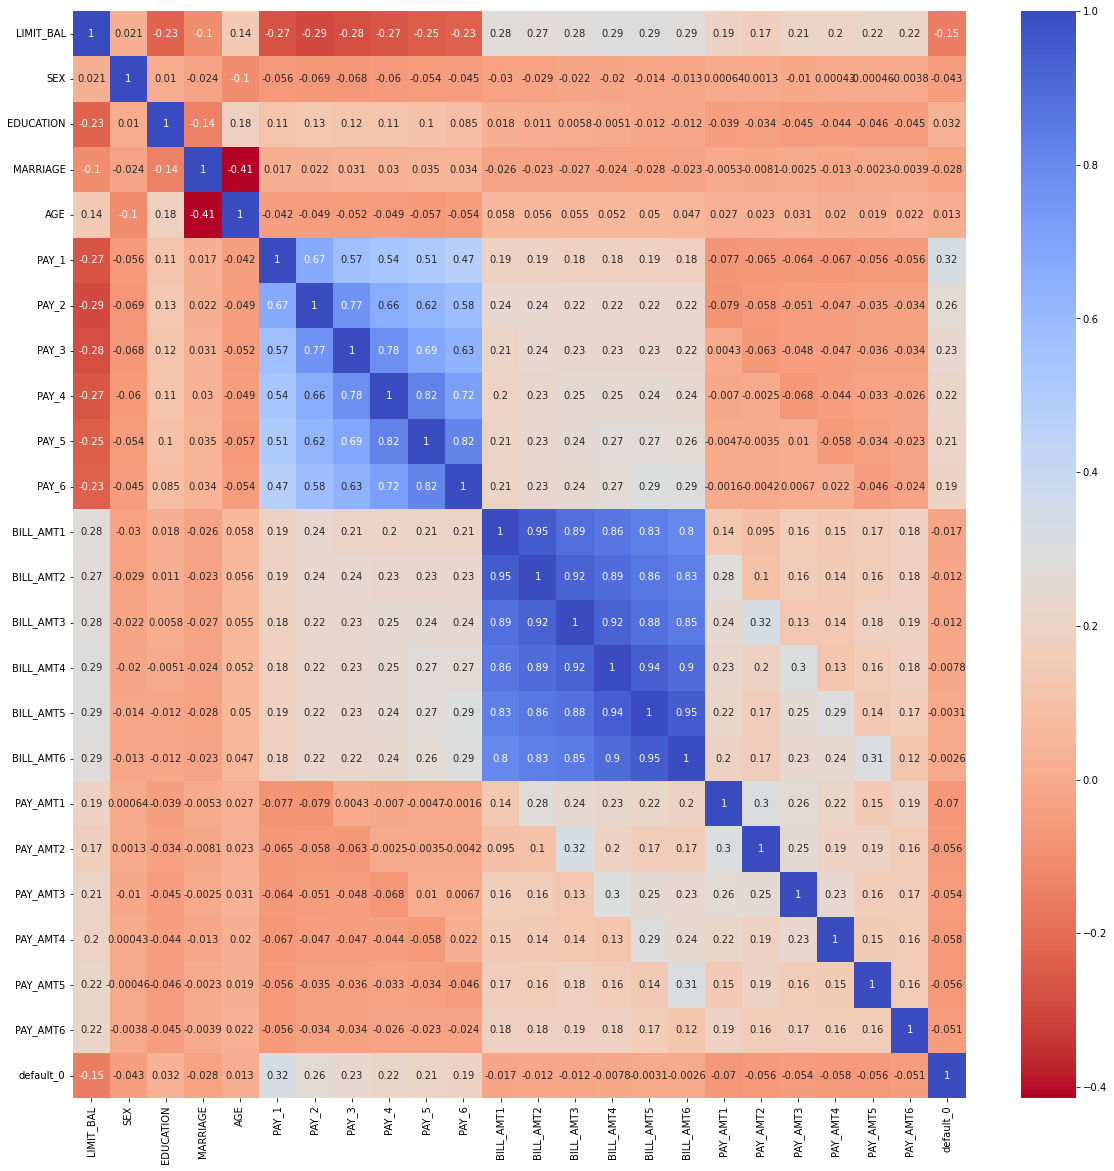

In [13]:
# plotting correlation heatmap/matrix
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

corrMap=sns.heatmap(data[corrFeatures].corr(),annot=True,cmap="coolwarm_r")

'''- matrix indicates relevant positive correlation in PAY variables , as well as some particularly uncorrelated such as LIMIT_BAL
- Significant levels of colinearity in PAY variables
'''

# Preparing data 

## Scaling data (Standandardisation)

In [14]:
st_data = data.drop(['default_0'], axis = 1)
st_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,90000,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,50000,1,1,2,37,0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,80000,1,2,2,34,2,2,2,2,2,...,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0
23997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
23998,30000,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [15]:
# Scaling data - Scaled Data
# Defining independent variables 
X = StandardScaler().fit_transform(st_data.values)
X = pd.DataFrame(X, columns=st_data.columns)

X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.138345,0.814938,0.214684,-1.071992,-1.246829,1.800948,1.792426,-0.692424,-0.664385,-1.529450,...,-0.666382,-0.673786,-0.665576,-0.653463,-0.334348,-0.216221,-0.291722,-0.309098,-0.310058,-0.289940
1,-0.599489,0.814938,0.214684,0.848281,-0.157582,0.021245,0.117653,0.141822,0.189032,0.235470,...,-0.480705,-0.450124,-0.418028,-0.391068,-0.245110,-0.182753,-0.235914,-0.244254,-0.245122,-0.015424
2,-0.907406,0.814938,0.214684,-1.071992,0.169192,0.021245,0.117653,0.141822,0.189032,0.235470,...,0.034805,-0.231894,-0.185997,-0.154847,-0.216775,-0.161335,-0.224752,-0.237770,-0.240642,-0.235037
3,-0.907406,-1.227087,0.214684,-1.071992,2.347686,-0.868606,0.117653,-0.692424,0.189032,0.235470,...,-0.159326,-0.346979,-0.348506,-0.330621,-0.216775,1.269099,0.266357,0.274497,-0.265317,-0.252661
4,-0.907406,-1.227087,-1.131299,0.848281,0.169192,0.021245,0.117653,0.141822,0.189032,0.235470,...,0.154796,-0.371107,-0.340673,-0.315551,-0.187382,-0.169754,-0.255056,-0.244254,-0.245122,-0.246018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.676468,-1.227087,0.214684,0.848281,-0.157582,1.800948,1.792426,1.810314,1.895866,2.000389,...,0.468961,0.536039,0.702449,0.716108,0.077158,-0.100217,-0.291722,0.144809,-0.310058,-0.070327
23996,-0.137612,-1.227087,1.560668,0.848281,0.822740,-0.868606,-0.719734,-0.692424,-0.664385,0.235470,...,-0.625799,-0.533652,-0.579627,-0.653463,-0.226357,-0.099144,0.210438,-0.300733,-0.310058,-0.289940
23997,-1.061365,-1.227087,0.214684,0.848281,0.169192,3.580651,2.629813,1.810314,-0.664385,0.235470,...,-0.636532,-0.347947,-0.324725,-0.326807,-0.334348,-0.244655,0.936052,-0.036754,-0.180187,-0.119740
23998,-0.676468,-1.227087,1.560668,-1.071992,0.604891,0.911097,-0.719734,0.141822,0.189032,0.235470,...,0.424526,0.149848,-0.469250,0.172485,4.715424,-0.103972,-0.225980,-0.184209,3.129184,-0.190895


# Logistic regression

## Splitting data 

In [16]:
y = data['default_0']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

## Model 

In [17]:
# Logistic Regressions
logreg = LogisticRegression(max_iter=2000, random_state= 42)

# fitting model 
logreg.fit(X_train, y_train)

# prediction
y_pred = logreg.predict(X_test)

## Confusion Matrix 

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4608,  108],
       [ 977,  307]])

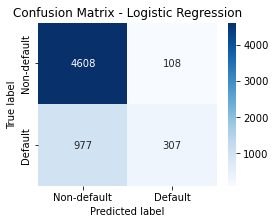

In [19]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

## Metrics

In [20]:
from sklearn.metrics import classification_report

print('Accuracy:', metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))



Accuracy: 0.8191666666666667
              precision    recall  f1-score   support

           0       0.83      0.98      0.89      4716
           1       0.74      0.24      0.36      1284

    accuracy                           0.82      6000
   macro avg       0.78      0.61      0.63      6000
weighted avg       0.81      0.82      0.78      6000



## Setting threshold

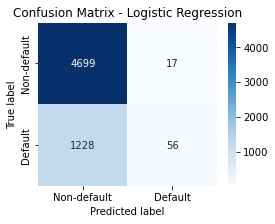

In [42]:
threshold = 0.7
y_prediction = logreg.predict_proba(X_test)[:,1]>threshold

threshold_cm = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(4,3))
sns.heatmap(threshold_cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");



## ROC Curve analysis 

In [22]:
# Obtaining predicted probabilities for 'X_validation'
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

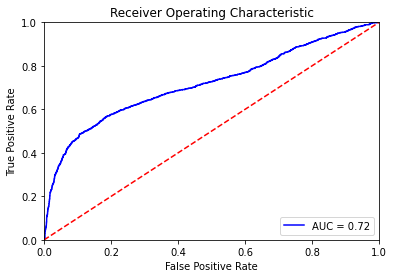

In [23]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Testing model on pilot dataset

In [24]:
# preparing pilot dataset 
# dropping 'default' column
pilot.drop(['default_0'], axis=1, inplace=True)
cols = pilot.columns
# scaling pilot dataset 
pilot = StandardScaler().fit_transform(pilot.values)
pilot = pd.DataFrame(pilot, columns=cols)

pilot

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.632642,-1.313315,-1.150820,0.864323,-0.705365,-0.000830,0.104026,0.114324,0.196038,0.233323,...,6.234682,8.217896,7.718934,7.357710,2.918091,2.509097,2.558707,1.086394,0.443790,0.734057
1,0.362718,-1.313315,-1.150820,0.864323,-0.705365,-1.661168,-1.484157,-1.507293,-1.516081,-1.494995,...,-0.712563,-0.685694,-0.681353,-0.662082,-0.340327,-0.387394,-0.360778,-0.325377,-0.285717,-0.341001
2,-0.106921,-1.313315,-1.150820,0.864323,-0.919145,-0.000830,0.104026,0.114324,0.196038,0.233323,...,0.676958,0.787291,0.844342,0.028108,-0.101515,0.337163,-0.109856,-0.043567,-0.195630,-0.278543
3,-1.124473,-1.313315,0.193596,-1.010564,0.256642,-0.000830,0.104026,0.114324,0.196038,0.233323,...,-0.407217,-0.386421,-0.369553,-0.659544,-0.239672,-0.281672,-0.312684,-0.203306,-0.277759,-0.341001
4,1.849910,-1.313315,0.193596,-1.010564,-0.170917,-0.830999,-0.690065,-0.696485,-0.660022,-0.630836,...,-0.527301,-0.557076,-0.423311,-0.527404,0.232977,0.471922,0.241481,0.709577,0.136548,0.104949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.284445,-1.313315,-1.150820,-1.010564,0.149752,-1.661168,-1.484157,-1.507293,-1.516081,-1.494995,...,-0.406842,-0.347174,-0.626708,-0.302451,2.935331,1.431602,1.569002,-0.322866,1.152446,3.032901
996,-0.889654,-1.313315,0.193596,0.864323,0.470422,1.659508,0.104026,0.114324,1.908156,0.233323,...,-0.495937,-0.465112,-0.448876,-0.437332,-0.221839,-0.242569,-0.283950,-0.255622,-0.232662,-0.184856
997,0.988904,-1.313315,0.193596,0.864323,-0.598476,1.659508,1.692209,0.114324,0.196038,0.233323,...,2.366626,2.639782,1.640069,1.555027,-0.340327,0.264316,0.445922,0.860457,-0.285717,-0.067747
998,0.910631,-1.313315,-1.150820,-1.010564,-0.491586,-0.000830,0.104026,0.114324,0.196038,0.233323,...,1.917404,1.772415,1.557336,1.544569,0.186944,0.199145,0.192387,0.023398,-0.020442,0.025940


In [25]:
#pilot["prob_default"]=
percent_default = logreg.predict_proba(pilot)

#pilot["is_default"]=
is_default = logreg.predict(pilot)


In [26]:
# counting defaults and non-default
unique, counts = np.unique(is_default, return_counts=True)
dict(zip(unique, counts))

{0: 923, 1: 77}

In [27]:
pilot["prob_default"]= percent_default[:, 1]


In [28]:
pilot["is_default"]= is_default

In [29]:
pilot

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prob_default,is_default
0,2.632642,-1.313315,-1.150820,0.864323,-0.705365,-0.000830,0.104026,0.114324,0.196038,0.233323,...,7.718934,7.357710,2.918091,2.509097,2.558707,1.086394,0.443790,0.734057,0.043636,0
1,0.362718,-1.313315,-1.150820,0.864323,-0.705365,-1.661168,-1.484157,-1.507293,-1.516081,-1.494995,...,-0.681353,-0.662082,-0.340327,-0.387394,-0.360778,-0.325377,-0.285717,-0.341001,0.072074,0
2,-0.106921,-1.313315,-1.150820,0.864323,-0.919145,-0.000830,0.104026,0.114324,0.196038,0.233323,...,0.844342,0.028108,-0.101515,0.337163,-0.109856,-0.043567,-0.195630,-0.278543,0.217268,0
3,-1.124473,-1.313315,0.193596,-1.010564,0.256642,-0.000830,0.104026,0.114324,0.196038,0.233323,...,-0.369553,-0.659544,-0.239672,-0.281672,-0.312684,-0.203306,-0.277759,-0.341001,0.287411,0
4,1.849910,-1.313315,0.193596,-1.010564,-0.170917,-0.830999,-0.690065,-0.696485,-0.660022,-0.630836,...,-0.423311,-0.527404,0.232977,0.471922,0.241481,0.709577,0.136548,0.104949,0.086218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.284445,-1.313315,-1.150820,-1.010564,0.149752,-1.661168,-1.484157,-1.507293,-1.516081,-1.494995,...,-0.626708,-0.302451,2.935331,1.431602,1.569002,-0.322866,1.152446,3.032901,0.024233,0
996,-0.889654,-1.313315,0.193596,0.864323,0.470422,1.659508,0.104026,0.114324,1.908156,0.233323,...,-0.448876,-0.437332,-0.221839,-0.242569,-0.283950,-0.255622,-0.232662,-0.184856,0.509384,1
997,0.988904,-1.313315,0.193596,0.864323,-0.598476,1.659508,1.692209,0.114324,0.196038,0.233323,...,1.640069,1.555027,-0.340327,0.264316,0.445922,0.860457,-0.285717,-0.067747,0.303023,0
998,0.910631,-1.313315,-1.150820,-1.010564,-0.491586,-0.000830,0.104026,0.114324,0.196038,0.233323,...,1.557336,1.544569,0.186944,0.199145,0.192387,0.023398,-0.020442,0.025940,0.144487,0


## Assessing results 

In [30]:
# highest probability of default 
pilot.sort_values(by=["prob_default"], ascending=False).head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prob_default,is_default
149,-0.576561,-1.313315,0.193596,-1.010564,-0.064027,6.640521,5.662665,4.979176,4.476334,3.689958,...,1.124193,1.061836,-0.340327,-0.387394,-0.360778,-0.325377,-0.285717,-0.341001,0.988211,1
77,0.284445,0.761432,0.193596,0.864323,0.363532,5.810352,4.868574,4.168368,3.620275,2.825799,...,2.436508,1.854197,-0.340327,-0.387394,-0.360778,-0.322656,-0.281208,-0.102568,0.962471,1
701,-1.124473,-1.313315,0.193596,0.864323,2.180657,4.150014,3.280391,2.546750,1.908156,1.961640,...,-0.368300,-0.340575,-0.340327,-0.387394,-0.360778,-0.220744,-0.232662,-0.262929,0.897121,1
986,-0.889654,-1.313315,0.193596,0.864323,0.149752,4.150014,3.280391,2.546750,1.908156,0.233323,...,-0.373344,-0.345483,-0.340327,-0.387394,-0.360778,-0.300684,-0.232662,-0.262929,0.892664,1
906,-1.202746,-1.313315,-1.150820,-1.010564,0.684201,3.319845,2.486300,1.735941,1.908156,1.961640,...,-0.547418,-0.530315,-0.340327,-0.387394,-0.207121,-0.325377,-0.266671,-0.315159,0.862273,1


In [31]:
# highest probability of non-default 
pilot.sort_values(by=["prob_default"], ascending=True).head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prob_default,is_default
49,1.536817,-1.313315,-1.150820,0.864323,0.042863,-0.830999,-0.690065,-0.696485,0.196038,0.233323,...,-0.399449,-0.341963,12.100905,11.922691,7.322079,-0.116112,-0.126552,0.049361,0.000118,0
968,1.849910,0.761432,-1.150820,-1.010564,2.073767,-0.830999,-0.690065,-0.696485,-0.660022,0.233323,...,2.436821,-0.496591,11.114967,4.852068,14.944164,-0.296708,-0.285717,9.554139,0.001045,0
444,0.362718,0.761432,1.538012,-1.010564,1.753098,-0.830999,-0.690065,-0.696485,-0.660022,-0.630836,...,-0.070188,0.288697,1.970187,10.482339,-0.346949,3.720411,2.695978,1.220449,0.005019,0
673,-0.106921,-1.313315,2.882429,0.864323,-0.384696,-0.000830,0.104026,0.114324,-0.660022,0.233323,...,1.812195,1.815396,-0.102226,10.249678,11.734804,-0.004504,-0.035881,0.096205,0.005779,0
913,1.067177,-1.313315,-1.150820,-1.010564,0.149752,-1.661168,-1.484157,-1.507293,-0.660022,-0.630836,...,-0.034534,-0.534444,1.042901,1.095392,1.729420,12.035341,0.114477,0.730075,0.011646,0


In [32]:
pilot.to_csv('pilot_assign.csv')